# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy
import sklearn

# import the KMEANS module so we can perform k mean clustering with sklear
from sklearn.cluster import KMeans

# Load data

In [3]:
data=pd.read_csv(r'C:\Users\Adeshola\Documents\3.12.+Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


# Plot the data

Text(0, 0.5, 'Layalty')

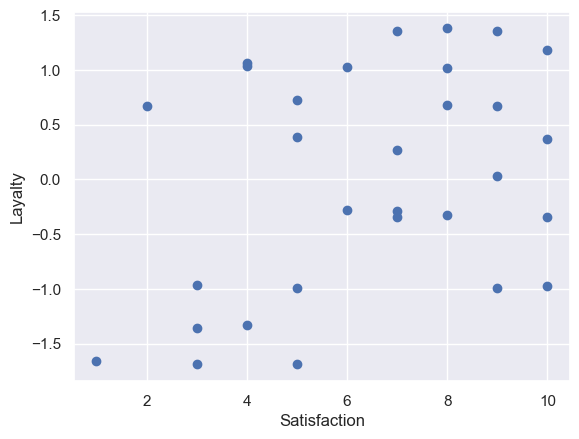

In [5]:
# We are creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Name your axis
plt.xlabel('Satisfaction')
plt.ylabel('Layalty')

# Selection the feature

In [6]:
# Select both feature by creating a copy of the data variable
x=data.copy()

# Clustering

In [7]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or te number we cluster we are aiming for
kmeans=KMeans(2)
# Fit the data
kmeans.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

# Clustering results

In [8]:
# Create a copy of the input data
clusters=x.copy()
# take note of the prediction clusters
clusters['cluster_pred']=kmeans.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

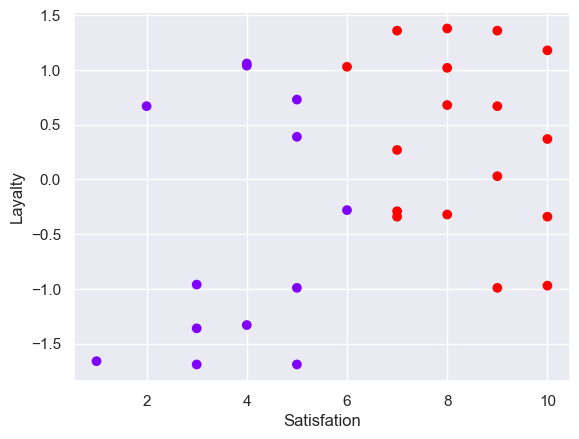

In [11]:
# plot the data using the longitude and latitude
#c(clor) is argument which could be coded with a variable 
# The variable in this case has value 0,1 indicating to plt.scatter, that there are three color(0,1)
# All point in cluster 0 will be the same color, all point in cluster 1_another one etc
# camp is the color map.Rainbow is a nice one but you can check other here:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap="rainbow")
plt.xlabel('Satisfation')
plt.ylabel('Layalty')
plt.show

# Standardize te variables

Let's standize and ceck te new result

In [13]:
# Import a library wic can do it easiy
from sklearn import preprocessing
# Scale the inputs 
#Preprocessing.scale scales each variable (column in x) with respect to itself
# the new result is an array
x_scaled= preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# Take advatage of the Elbow method 

In [17]:
# create an empty list
wcss=[]

# Create all passible cluster solution with a loop 
for i in range(1,10):
    # cluter solution with i clusters
    kmeans=KMeans(i)
    # Fit the data
    kmeans.fit(x_scaled)
    #Append the value to the WCSS list
    wcss.append(kmeans.inertia_)

# check the result
wcss

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 5.34807941029098,
 4.393997941560441,
 3.8627362912882823]

Text(0, 0.5, 'WCSS')

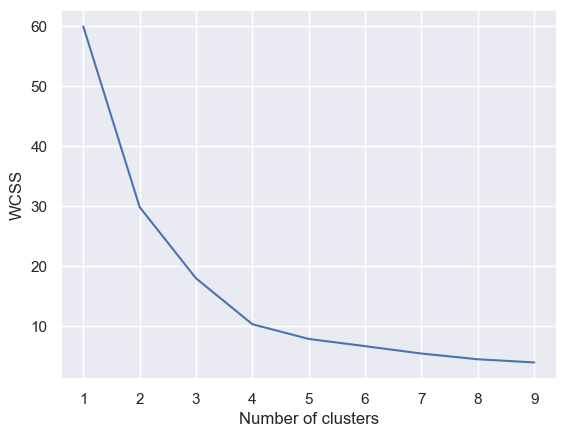

In [18]:
# Plot the number of cluster vs WCSS
plt.plot(range(1,10),wcss)
# Name your axis
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Explore clustering solution and select the number of clusters

In [20]:
# Fiddle with K(the number of clusters)
kmeans_new=KMeans(9)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new=x.copy()
clusters_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [21]:
#check if everything seem right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,6
1,6,-0.28,2
2,5,-0.99,6
3,7,-0.29,2
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,5
7,8,-0.32,2
8,8,1.02,7
9,8,0.68,7


<function matplotlib.pyplot.show(close=None, block=None)>

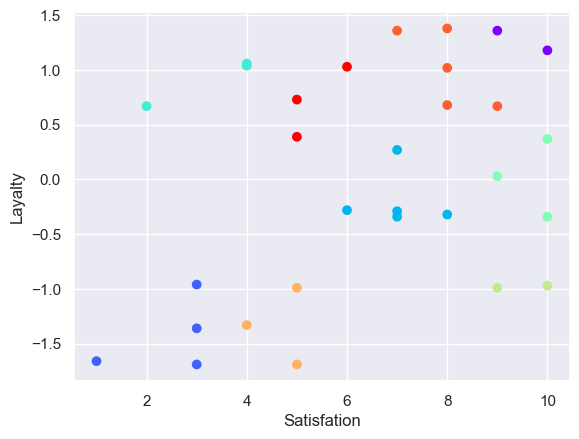

In [22]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap="rainbow")
plt.xlabel('Satisfation')
plt.ylabel('Layalty')
plt.show